In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
date = int(time.time())
a_year_before = date - 31556926

btc_request = f'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from={a_year_before}&to={date}'

r = requests.get(btc_request)

In [3]:
database = r.json()
prices = np.array(database['prices'])

In [4]:
prices[:,0] /= 1000

In [5]:
datetime.fromtimestamp(int(prices[0][0])).strftime('%d-%m-%Y')

'12-02-2020'

In [6]:
price_series = pd.Series(prices[:,1], index=(prices[:,0]))

In [7]:
price_dataframe = pd.DataFrame(prices, columns=['UNIX', 'USD'])

In [8]:
dates = [datetime.fromtimestamp(int(i)).strftime('%d-%m-%Y') for i in prices[:,0]]

In [9]:
price_dataframe['DATE'] = dates

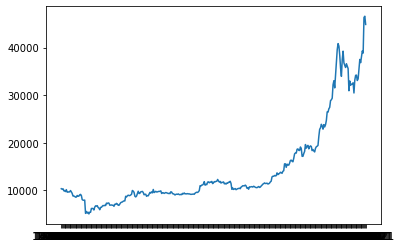

In [10]:
plt.plot(price_dataframe['DATE'], price_dataframe['USD'])